In [63]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

Technical Information for variable names, additional information, etc.
https://www2.census.gov/programs-surveys/abs/technical-documentation/api/ABS_API_CBO-1-26-2021.pdf

In [64]:
# ensure working connection to api for CBO - Owner acquired business in 2018
# pass in desired variables to narrow query for business owners: QDESC code for intial ownership (O02), and OWNCHAR code for initial ownership as of 2018 (CM03)
def getHTML(url):
    response = requests.get(url)
    return response.text

response = requests.get("https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX_LABEL,OWNER_ETH_LABEL,OWNER_RACE_LABEL,OWNER_VET_LABEL,OWNPDEMP,OWNPDEMP_PCT,STATE&for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:*&OWNCHAR=CM03&NAICS2017=00&QDESC=O02&key=68ecfc6192ef15a9b164753aa2b1b05e1d5e8e69")
print(response.status_code)

200


In [65]:
# receive response in json format
response = requests.get("https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX_LABEL,OWNER_ETH_LABEL,OWNER_RACE_LABEL,OWNER_VET_LABEL,OWNPDEMP,OWNPDEMP_PCT,STATE&for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:*&OWNCHAR=CM03&NAICS2017=00&QDESC=O02&key=68ecfc6192ef15a9b164753aa2b1b05e1d5e8e69")
metro_data = response.json()

In [66]:
# create dataframe from cbo - Metro Areas Top 20 and Bottom 20 by Total Business Owners
cbo_m = pd.DataFrame(metro_data,columns=metro_data.pop(0))

In [67]:
# view dataframe
cbo_m

,NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX_LABEL,OWNER_ETH_LABEL,OWNER_RACE_LABEL,OWNER_VET_LABEL,OWNPDEMP,OWNPDEMP_PCT,STATE,OWNCHAR,NAICS2017,QDESC,metropolitan statistical area/micropolitan statistical area
0,"Spokane-Spokane Valley, WA Metro Area",310M400US44060,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,0,0.0,None,CM03,00,O02,44060
1,"Syracuse, NY Metro Area",310M400US45060,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,0,0.0,None,CM03,00,O02,45060
2,"Tallahassee, FL Metro Area",310M400US45220,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,0,0.0,None,CM03,00,O02,45220
3,"Tampa-St. Petersburg-Clearwater, FL Metro Area",310M400US45300,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,0,0.0,None,CM03,00,O02,45300
4,"Texarkana, TX-AR Metro Area",310M400US45500,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,0,0.0,None,CM03,00,O02,45500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,"Springfield, IL Metro Area",310M400US44100,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,0,0.0,None,CM03,00,O02,44100
285,"Springfield, MA Metro Area",310M400US44140,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,0,0.0,None,CM03,00,O02,44140
286,"Springfield, MO Metro Area",310M400US44180,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,0,0.0,None,CM03,00,O02,44180
287,"Springfield, OH Metro Area",310M400US44220,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,0,0.0,None,CM03,00,O02,44220


In [68]:
# fix data type for OWNPDEMP (Num of Biz Owners)
cbo_m['OWNPDEMP']=cbo_m['OWNPDEMP'].astype(float)

In [69]:
# check
cbo_m.dtypes

NAME                                                            object
GEO_ID                                                          object
NAICS2017_LABEL                                                 object
OWNER_SEX_LABEL                                                 object
OWNER_ETH_LABEL                                                 object
OWNER_RACE_LABEL                                                object
OWNER_VET_LABEL                                                 object
OWNPDEMP                                                       float64
OWNPDEMP_PCT                                                    object
STATE                                                           object
OWNCHAR                                                         object
NAICS2017                                                       object
QDESC                                                           object
metropolitan statistical area/micropolitan statistical area     object
dtype:

In [70]:
# drop missing values in column OWNPDEMP
cbo_m_clean = cbo_m[cbo_m['OWNPDEMP'] != 0]

In [73]:
# view data frame
cbo_m_clean

,NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX_LABEL,OWNER_ETH_LABEL,OWNER_RACE_LABEL,OWNER_VET_LABEL,OWNPDEMP,OWNPDEMP_PCT,STATE,OWNCHAR,NAICS2017,QDESC,metropolitan statistical area/micropolitan statistical area
15,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",310M400US47900,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,1206.0,1.7,None,CM03,00,O02,47900
86,"Las Vegas-Henderson-Paradise, NV Metro Area",310M400US29820,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,170.0,0.9,None,CM03,00,O02,29820
101,"Los Angeles-Long Beach-Anaheim, CA Metro Area",310M400US31080,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,2542.0,1.2,None,CM03,00,O02,31080
113,"Atlanta-Sandy Springs-Roswell, GA Metro Area",310M400US12060,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,1052.0,1.5,None,CM03,00,O02,12060
118,"Baltimore-Columbia-Towson, MD Metro Area",310M400US12580,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,522.0,1.5,None,CM03,00,O02,12580
140,"Boston-Cambridge-Newton, MA-NH Metro Area",310M400US14460,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,1243.0,2.0,None,CM03,00,O02,14460
153,"Charlotte-Concord-Gastonia, NC-SC Metro Area",310M400US16740,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,452.0,1.3,None,CM03,00,O02,16740
157,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",310M400US16980,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,1366.0,1.1,None,CM03,00,O02,16980
159,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",310M400US33100,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,1496.0,1.5,None,CM03,00,O02,33100
163,"Minneapolis-St. Paul-Bloomington, MN-WI Metro ...",310M400US33460,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,561.0,1.0,None,CM03,00,O02,33460


In [74]:
# filter out columns with redundant information
cbo_m_clean = cbo_m_clean[['NAME','GEO_ID','OWNPDEMP','metropolitan statistical area/micropolitan statistical area']]

In [75]:
# create data frame to simplify metro area name
cbo_m_clean_owners_geoid = cbo_m_clean[['NAME','OWNPDEMP','GEO_ID','metropolitan statistical area/micropolitan statistical area']]
# split NAME string to separate city from other location info
cbo_m_clean_owners_geoid[['City','State']] = cbo_m_clean_owners_geoid['NAME'].str.split(',', expand=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [76]:
# merge data frames
cbo_m_clean_owners_short = cbo_m_clean.merge(cbo_m_clean_owners_geoid,how='inner',on='NAME')
# rename OWNPDEMP column
cbo_m_clean_owners_short = cbo_m_clean_owners_short.rename(columns={"OWNPDEMP_x":"Count_Of_Business_Owners"})
# exclude redundant columns
cbo_m_clean_owners_short = cbo_m_clean_owners_short[['City','Count_Of_Business_Owners']]

In [77]:
# view data frame
cbo_m_clean_owners_short

,City,Count_Of_Business_Owners
0,Washington-Arlington-Alexandria,1206.0
1,Las Vegas-Henderson-Paradise,170.0
2,Los Angeles-Long Beach-Anaheim,2542.0
3,Atlanta-Sandy Springs-Roswell,1052.0
4,Baltimore-Columbia-Towson,522.0
5,Boston-Cambridge-Newton,1243.0
6,Charlotte-Concord-Gastonia,452.0
7,Chicago-Naperville-Elgin,1366.0
8,Miami-Fort Lauderdale-West Palm Beach,1496.0
9,Minneapolis-St. Paul-Bloomington,561.0


In [78]:
# sort by top
cbo_m_clean_owners_short_top = cbo_m_clean_owners_short.sort_values(by='Count_Of_Business_Owners',ascending=False)

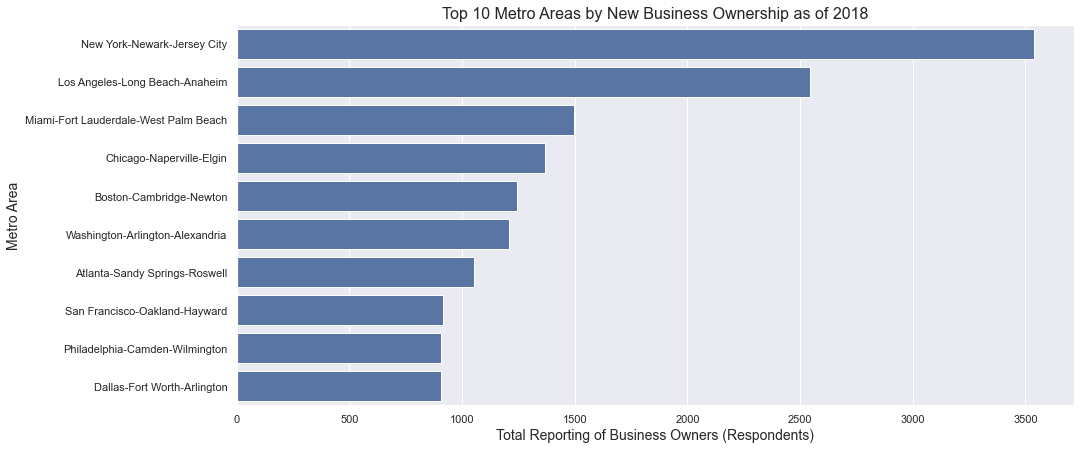

In [79]:
# Top 10 Metro Areas by Total Biz Owners, ownership as of 2018 visualization
sns.set_theme(style="darkgrid", palette="deep")
plt.figure(figsize = (15,7))
ax = sns.barplot(x=cbo_m_clean_owners_short_top[0:10]['Count_Of_Business_Owners'], y=cbo_m_clean_owners_short_top[0:10]['City'], color='b', orient='h')
ax.set_xlabel('Total Reporting of Business Owners (Respondents)', size=14)
ax.set_ylabel('Metro Area', size=14)
plt.title('Top 10 Metro Areas by New Business Ownership as of 2018', size=16);

In [80]:
############ CBO api for US born biz owners
# pass in desired variables to narrow query for us-born biz owners: QDESC code for born status (O11), QDESC label (USBORN) and OWNCHAR code for US born (EH)
def getHTML(url):
    response = requests.get(url)
    return response.text

response = requests.get("https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_RACE,OWNPDEMP&for=us:*&OWNCHAR=EH&NAICS2017=00&QDESC=O11&QDESC_LABEL=USBORN&key=68ecfc6192ef15a9b164753aa2b1b05e1d5e8e69")
print(response.status_code)

200


In [18]:
# receive response in json format
response = requests.get("https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_RACE,OWNPDEMP&for=us:*&OWNCHAR=EH&NAICS2017=00&QDESC=O11&QDESC_LABEL=USBORN&key=68ecfc6192ef15a9b164753aa2b1b05e1d5e8e69")
us_data = response.json()

In [19]:
# create dataframe for usborn
cbo_born = pd.DataFrame(us_data,columns=us_data.pop(0))

In [20]:
############ CBO api for foreign born biz owners
# pass in desired variables to narrow query for not born in us-born biz owners: QDESC code for born status (O11), QDESC label (USBORN) and OWNCHAR code for not-US born (EI)
def getHTML(url):
    response = requests.get(url)
    return response.text

response = requests.get("https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_RACE,OWNPDEMP&for=us:*&OWNCHAR=EI&NAICS2017=00&QDESC=O11&QDESC_LABEL=USBORN&key=68ecfc6192ef15a9b164753aa2b1b05e1d5e8e69")
print(response.status_code)

200


In [21]:
# receive response in json format
response = requests.get("https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_RACE,OWNPDEMP&for=us:*&OWNCHAR=EI&NAICS2017=00&QDESC=O11&QDESC_LABEL=USBORN&key=68ecfc6192ef15a9b164753aa2b1b05e1d5e8e69")
for_data = response.json()

In [22]:
# create dataframe for notusborn
cbo_foreign = pd.DataFrame(for_data,columns=for_data.pop(0))

In [23]:
# fix data type for OWNPDEMP
cbo_born['OWNPDEMP']=cbo_born['OWNPDEMP'].astype(float)
cbo_foreign['OWNPDEMP']=cbo_foreign['OWNPDEMP'].astype(float)

In [24]:
# create column to create unique id with owner sex and owner race
cbo_born['SEX_RACE'] = cbo_born['OWNER_SEX'] + cbo_born['OWNER_RACE']
cbo_foreign['SEX_RACE'] = cbo_foreign['OWNER_SEX'] + cbo_foreign['OWNER_RACE']

In [25]:
# merge cbo_born and cbo_foreign tables together on unique sex/race id
cbo_compare_b = cbo_foreign.merge(cbo_born,how='inner',on='SEX_RACE')

In [26]:
# rename columns for readability
cbo_compare_b.rename(columns={"OWNER_SEX_x":"OWNER_SEX_CODE","OWNER_RACE_x":"OWNER_RACE_CODE","OWNPDEMP_x":"TOTAL_OWNERS_FOREIGN","OWNCHAR_x":"FOREIGN_BORN","OWNPDEMP_y":"TOTAL_OWNERS_USBORN","OWNCHAR_y":"US_BORN"},inplace=True)

In [27]:
# rename sex and race codes for readability
cbo_compare_b.loc[cbo_compare_b["OWNER_SEX_CODE"] == "001", "OWNER_SEX_CODE"] = "Both"
cbo_compare_b.loc[cbo_compare_b["OWNER_SEX_CODE"] == "002", "OWNER_SEX_CODE"] = "Female"
cbo_compare_b.loc[cbo_compare_b["OWNER_SEX_CODE"] == "003", "OWNER_SEX_CODE"] = "Male"
cbo_compare_b.loc[cbo_compare_b["OWNER_RACE_CODE"] == "00", "OWNER_RACE_CODE"] = "Total"
cbo_compare_b.loc[cbo_compare_b["OWNER_RACE_CODE"] == "30", "OWNER_RACE_CODE"] = "White"
cbo_compare_b.loc[cbo_compare_b["OWNER_RACE_CODE"] == "40", "OWNER_RACE_CODE"] = "Black or African American"
cbo_compare_b.loc[cbo_compare_b["OWNER_RACE_CODE"] == "50", "OWNER_RACE_CODE"] = "American Indian and Alaska Native"
cbo_compare_b.loc[cbo_compare_b["OWNER_RACE_CODE"] == "60", "OWNER_RACE_CODE"] = "Asian"
cbo_compare_b.loc[cbo_compare_b["OWNER_RACE_CODE"] == "70", "OWNER_RACE_CODE"] = "Native Hawaiian and Other Pacific Islander"

In [28]:
# filter out 'minority' and 'nonminority' race codes to remove duplicate data
cbo_compare_b_simp = cbo_compare_b[cbo_compare_b.OWNER_RACE_CODE != '90']
cbo_compare_b_simp = cbo_compare_b_simp[cbo_compare_b_simp.OWNER_RACE_CODE != '92']

In [29]:
# narrow to necessary data
cbo_compare_b_simp1 = cbo_compare_b_simp[['OWNER_SEX_CODE','OWNER_RACE_CODE','TOTAL_OWNERS_FOREIGN','TOTAL_OWNERS_USBORN']]

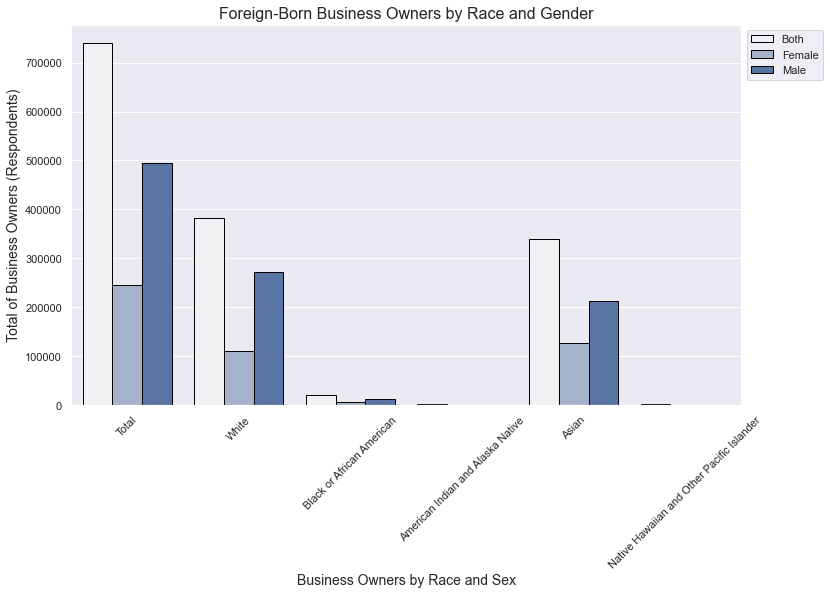

In [30]:
# Foreign-Born Business Owners by Race and Gender visualization
sns.set_theme(style="darkgrid", palette="deep")
plt.figure(figsize = (12,7))
ax = sns.barplot(data=cbo_compare_b_simp1, x=cbo_compare_b_simp1['OWNER_RACE_CODE'], y=cbo_compare_b_simp1['TOTAL_OWNERS_FOREIGN'], color='b', edgecolor='black', hue='OWNER_SEX_CODE')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel('Business Owners by Race and Sex', size=14)
ax.set_ylabel('Total of Business Owners (Respondents)', size=14)
plt.title('Foreign-Born Business Owners by Race and Gender', size=16);

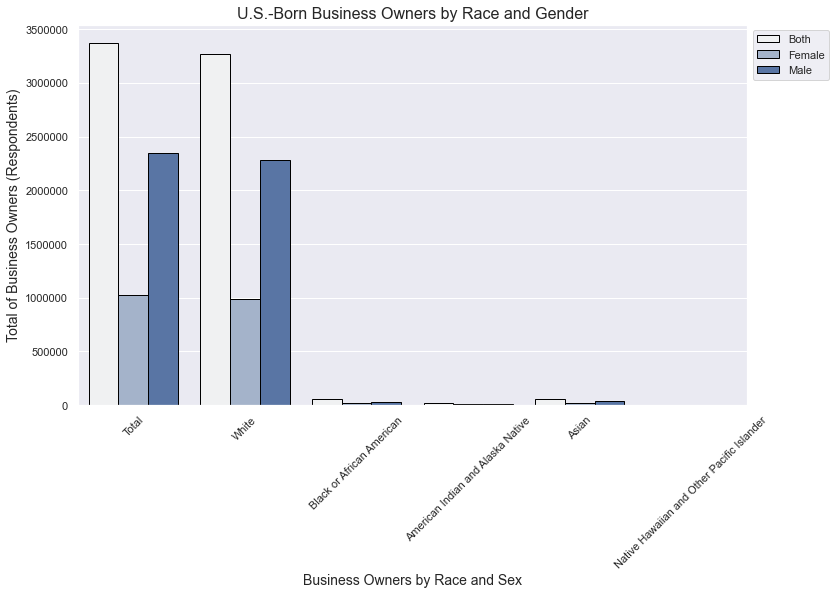

In [31]:
# US-Born Business Owners by Race and Gender visualization
plt.figure(figsize = (12,7))
ax = sns.barplot(data=cbo_compare_b_simp1, x=cbo_compare_b_simp1['OWNER_RACE_CODE'], y=cbo_compare_b_simp1['TOTAL_OWNERS_USBORN'], color='b', edgecolor='black', hue='OWNER_SEX_CODE')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel('Business Owners by Race and Sex', size=14)
ax.set_ylabel('Total of Business Owners (Respondents)', size=14)
plt.title('U.S.-Born Business Owners by Race and Gender', size=16);

In [81]:
############ CBO api for biz owners based on education: hs grad
# pass in desired variables to narrow query for hs grad biz owners: QDESC code for education (O07), QDESC label (EDUC) and OWNCHAR code for hs grad (DN)

def getHTML(url):
    response = requests.get(url)
    return response.text

response = requests.get("https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_RACE,OWNPDEMP&for=state:*&OWNCHAR=DN&NAICS2017=00&QDESC=O07&QDESC_LABEL=EDUC&key=68ecfc6192ef15a9b164753aa2b1b05e1d5e8e69")
print(response.status_code)

200


In [33]:
# receive response in json format
response = requests.get("https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_RACE,OWNPDEMP&for=state:*&OWNCHAR=DN&NAICS2017=00&QDESC=O07&QDESC_LABEL=EDUC&key=68ecfc6192ef15a9b164753aa2b1b05e1d5e8e69")
edudata = response.json()

In [34]:
# create dataframe for hs grads
cbo_edu_hs = pd.DataFrame(edudata,columns=edudata.pop(0))

In [35]:
############ CBO api for biz owners based on education: bachelors degree
# pass in desired variables to narrow query for hs grad biz owners: QDESC code for education (O07), QDESC label (EDUC) and OWNCHAR code for bachelors degree (DR)

def getHTML(url):
    response = requests.get(url)
    return response.text

response = requests.get("https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_RACE,OWNPDEMP&for=state:*&OWNCHAR=DR&NAICS2017=00&QDESC=O07&QDESC_LABEL=EDUC&key=68ecfc6192ef15a9b164753aa2b1b05e1d5e8e69")
print(response.status_code)

200


In [36]:
# receive response in json format
response = requests.get("https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_RACE,OWNPDEMP&for=state:*&OWNCHAR=DR&NAICS2017=00&QDESC=O07&QDESC_LABEL=EDUC&key=68ecfc6192ef15a9b164753aa2b1b05e1d5e8e69")
edudata2 = response.json()

In [37]:
# create dataframe for hs grads
cbo_edu_bach = pd.DataFrame(edudata2,columns=edudata2.pop(0))

In [38]:
# merge two api queries on NAME (state)
cbo_compare_edu = cbo_edu_bach.merge(cbo_edu_hs,how='inner',on='NAME')

In [39]:
# fix data types
cbo_compare_edu['OWNPDEMP_x']=cbo_compare_edu['OWNPDEMP_x'].astype(float)
cbo_compare_edu['OWNPDEMP_y']=cbo_compare_edu['OWNPDEMP_y'].astype(float)

In [40]:
# rename columns for readability
cbo_compare_edu.rename(columns={"OWNPDEMP_x":"BACHELORS_DEGREE_OWNERS","OWNPDEMP_y":"HSGRAD_GED_OWNERS"},inplace=True)

In [41]:
# filter out unnecessary columns
cbo_compare_edu_simp = cbo_compare_edu[['NAME','BACHELORS_DEGREE_OWNERS','HSGRAD_GED_OWNERS']]

In [42]:
# sort values based on high HS grads for plot
cbo_compare_edu_simp_hs_sort = cbo_compare_edu_simp.sort_values(by='HSGRAD_GED_OWNERS',ascending=False)
# sort values based on high Bach degrees for plot
cbo_compare_edu_simp_bach_sort = cbo_compare_edu_simp.sort_values(by='BACHELORS_DEGREE_OWNERS',ascending=False)

<Figure size 1080x504 with 0 Axes>

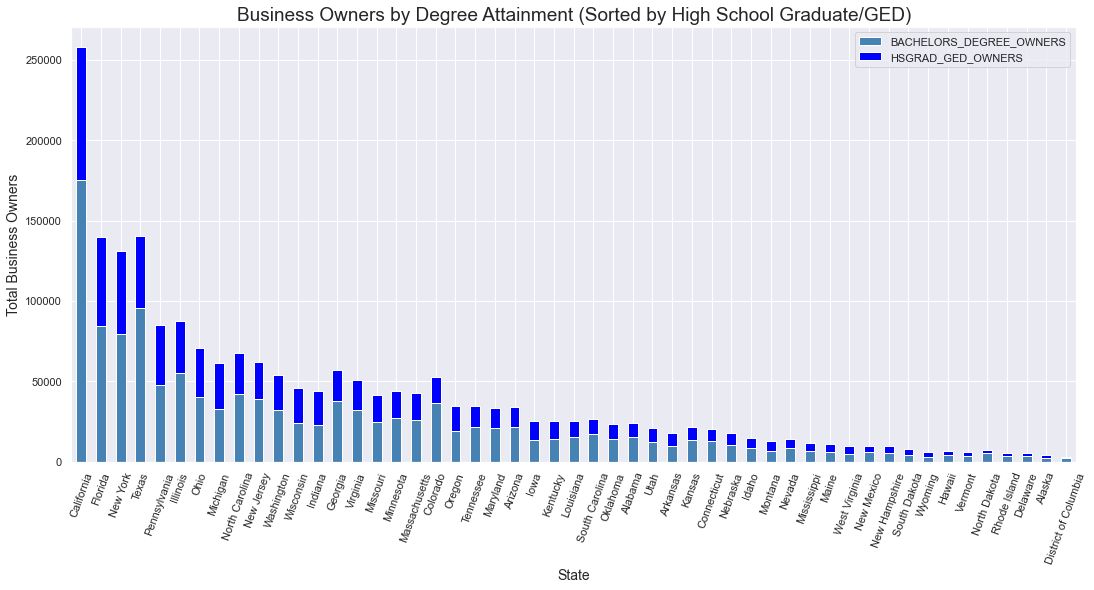

In [43]:
#Business Owners by Degree Attainment (Sorted by High School Graduate/GED) visualization
sns.set_theme(style="darkgrid", palette="deep")
plt.figure(figsize = (15,7))
cbo_compare_edu_simp_hs_sort.set_index('NAME').plot(kind='bar', stacked=True, color=['steelblue', 'blue'])
plt.title('Business Owners by Degree Attainment (Sorted by High School Graduate/GED)', fontsize=19)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Business Owners', fontsize=14)
plt.xticks(rotation=70)
plt.gcf().set_size_inches(18,8);

<Figure size 1080x504 with 0 Axes>

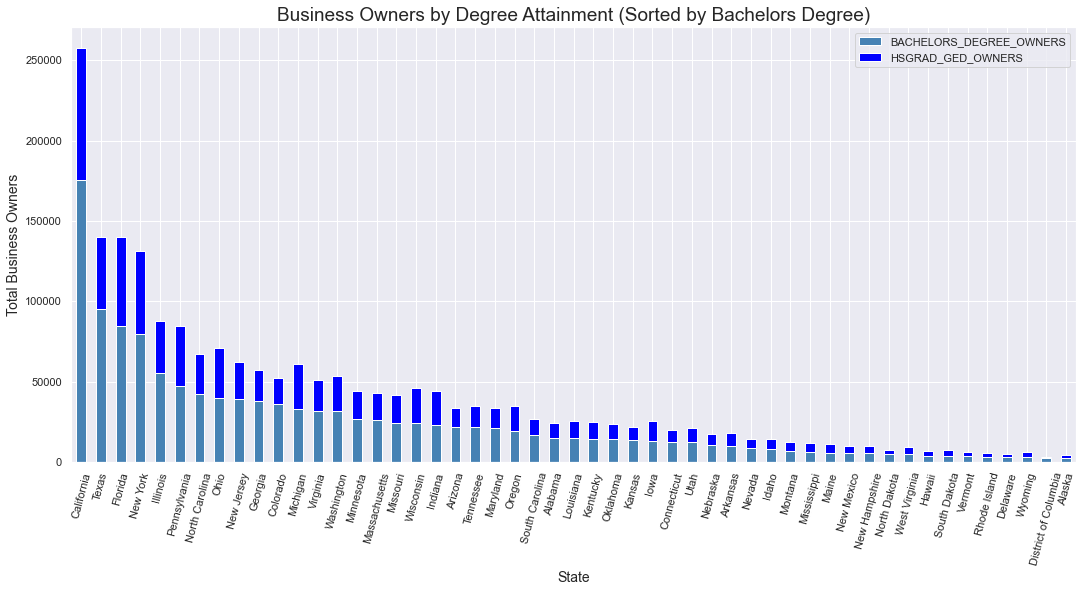

In [44]:
#Business Owners by Degree Attainment (Sorted by Bachelors Degree) visualization
sns.set_theme(style="darkgrid", palette="deep")
plt.figure(figsize = (15,7))
cbo_compare_edu_simp_bach_sort.set_index('NAME').plot(kind='bar', stacked=True, color=['steelblue', 'blue'])
plt.title('Business Owners by Degree Attainment (Sorted by Bachelors Degree)', fontsize=19)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Business Owners', fontsize=14)
plt.xticks(rotation=75)
plt.gcf().set_size_inches(18,8);